In [163]:
import pysentiment2 as py
import pandas as pd

In [164]:
data=pd.read_csv('data_sentiment.csv')

In [166]:
print(data.head())

   Unnamed: 0  M&A SDC Deal Number Date Announced      Target Full Name  \
0           0           2675324040     2015-09-16         SABMiller PLC   
1           1           3409687020     2019-06-09           Raytheon Co   
2           2           3173017020     2017-12-14  21st Century Fox Inc   
3           3           3586676040     2020-06-11           Unilever NV   
4           4           3021003020     2016-10-22       Time Warner Inc   

           Acquiror Full Name    Target Macro Industry  \
0  Anheuser-Busch Inbev SA/NV         Consumer Staples   
1    United Technologies Corp              Industrials   
2              Walt Disney Co  Media and Entertainment   
3                Unilever PLC         Consumer Staples   
4                    AT&T Inc  Media and Entertainment   

   Acquiror Macro Industry Acquiror Nation   Deal Value  \
0         Consumer Staples         Belgium  1,01,490.57   
1              Industrials   United States     86831.16   
2  Media and Entertainm

In [173]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
x_old=data['polarity']
x=data['polarity']
# add constant
x=sm.add_constant(x)
results = sm.OLS(data['Stock Price Change']*100,x).fit()

In [174]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Stock Price Change   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     44.24
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           8.03e-11
Time:                        21:44:40   Log-Likelihood:                -2398.3
No. Observations:                 476   AIC:                             4801.
Df Residuals:                     474   BIC:                             4809.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -33.0505      6.103     -5.416      0.0

const      -33.050464
polarity    70.409882
dtype: float64
(476, 2)


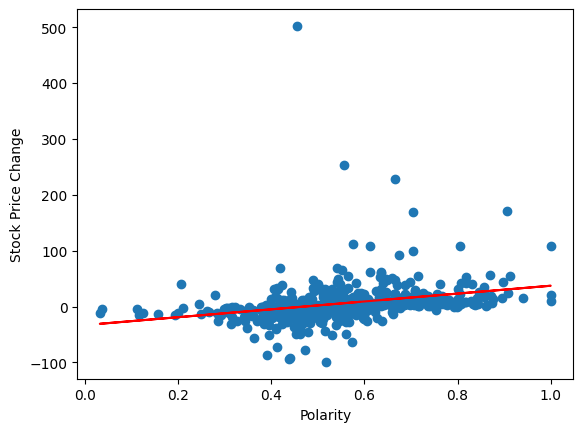

In [175]:
print(results.params)
 
import matplotlib.pyplot as plt
print(x.shape)
plt.scatter(x_old, data['Stock Price Change']*100)
# plot the regression line
yhat = results.params[0] + x*results.params[1]
plt.plot(x, yhat, color='red')
plt.xlabel('Polarity')
plt.ylabel('Stock Price Change')
plt.show()

In [176]:
# remove outliers in the Stock Price Change and re-run the regression
data2=data[data['Stock Price Change']*100 < 200]
x_old=data2['polarity']
x=data2['polarity']
x=sm.add_constant(x)
results = sm.OLS(data2['Stock Price Change']*100,x).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Stock Price Change   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     102.3
Date:                Tue, 05 Dec 2023   Prob (F-statistic):           6.68e-22
Time:                        21:44:40   Log-Likelihood:                -2197.4
No. Observations:                 473   AIC:                             4399.
Df Residuals:                     471   BIC:                             4407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.1757      4.125     -8.771      0.0

In [177]:
print(results.params)
 
import matplotlib.pyplot as plt
plt.scatter(x_old, data2['Stock Price Change']*100)
# plot the regression line
yhat = results.params[0]+x*results.params[1]
plt.plot(x, yhat, color='red')
plt.xlabel('Polarity')
plt.ylabel('Stock Price Change')
plt.show()

const      -36.175701
polarity    72.369464
dtype: float64


In [178]:
results.pvalues

const       3.264538e-17
polarity    6.684631e-22
dtype: float64